In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train = df_train.select_dtypes(exclude=object)
df_test = df_test.select_dtypes(exclude=object)

In [8]:
df_train.dropna(inplace=True, how ='any')
df_test.dropna(inplace=True, how ='any')

In [9]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
X = df_train.drop(['SalePrice','Id'], axis=1)
y = df_train['SalePrice']

In [11]:
X.shape

(1121, 36)

In [12]:
X_train, X_validation, y_train, y_validation =  train_test_split(X, y , test_size = 0.2, random_state= 5)

In [13]:
linear_model = LinearRegression()

In [14]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
linear_model.predict(X_validation)

array([143874.78771943, 124468.58126674, 259556.33800133, 119164.03909901,
       112341.11697054, 186659.7974481 , 213360.40132053, 239213.21874829,
       111027.32034873, 243441.83483658, 101352.57665878, 207874.25082017,
       153959.78364878, 213781.3552733 , 240889.0876908 , 229930.00208762,
        59936.37888396, 168275.79617081, 161155.82046103, 203276.9873529 ,
        90947.6709543 , 310861.7446658 , 173703.9297942 , 227834.26535763,
       239054.97470866, 228543.00974616, 233960.50267343, 106130.01749596,
       163138.6704254 , 180318.23944153, 177747.97926211, 202035.80075348,
       133195.1125015 , 224626.75336038, 128178.25458489, 218794.87680873,
        92414.51074565, 103259.60889042, 175667.36445354, 258522.96745801,
        90339.06096102, 171197.75654792, 161424.57596471, 241302.62515373,
       206331.36141231, 317138.67096974, 184867.33415315, 220082.82721345,
       300392.12243157,  99951.07962879, 135770.53692348, 214843.53932135,
        89854.23738063, 1

In [16]:
linear_model.score(X_validation,y_validation)

0.8329543168612676

Preprocessing

In [18]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
df_train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'Fence'], axis=1, inplace=True)
df_test.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'Fence'], axis=1, inplace=True)

In [21]:
print(df_train.shape)
print(df_test.shape)

(1460, 75)
(1459, 74)


<AxesSubplot:>

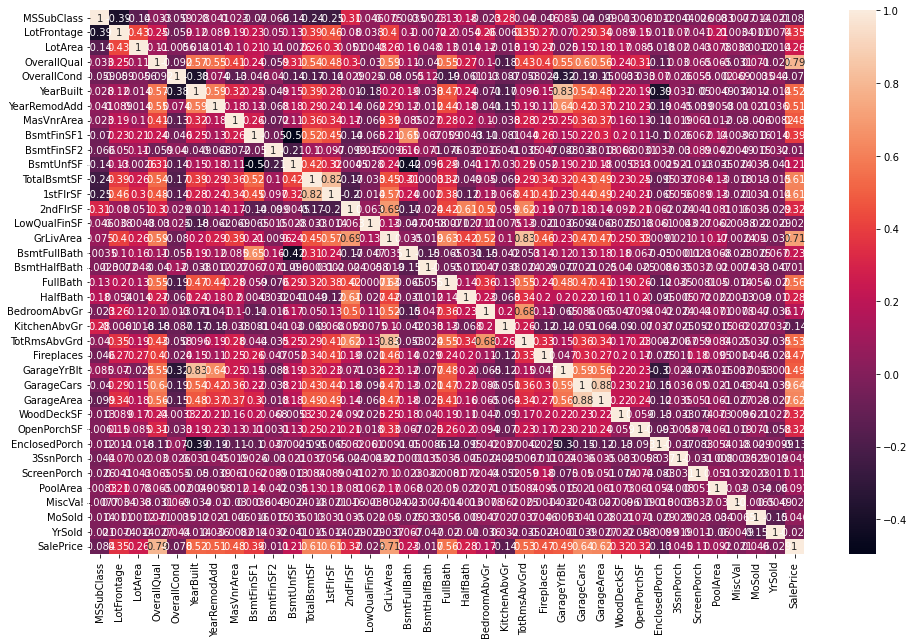

In [22]:
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot=True)

In [23]:
# removing columns having less correlation with SalePrice feature
cols = []
correlation_data = df_train.corr()
correlation_values = correlation_data['SalePrice'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.2:
        cols.append(correlation_values.index[col])
        df_train = df_train.drop([correlation_values.index[col]], axis=1)
df_train.shape

(1460, 61)

In [24]:
cols

['BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond',
 'MoSold',
 '3SsnPorch',
 'YrSold',
 'LowQualFinSF',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2']

In [25]:
df_test.drop(cols, inplace=True, axis = 1)

In [26]:
print(df_train.shape,df_train.columns.unique())
print(df_test.shape,df_test.columns.unique())

(1460, 61) Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')
(1459, 60) Index(['MSZoning', 'LotFr

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [28]:
#Categorize the features into categorical and numerical
#data_types=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_col=[]
categorical_col=[]
features=df_train.columns.values.tolist()
for i in features:
    if df_train[i].dtype == object:
        categorical_col.append(i)
    else: 
        numerical_col.append(i)

print("Numerical columns are: ", numerical_col, len(numerical_col))
print("Categorical columns are: " , categorical_col, len(categorical_col))

Numerical columns are:  ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'] 23
Categorical columns are:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 38


In [29]:
for col in numerical_col:
    df_train[col]=df_train[col].fillna(df_train[col].mean())
    if col!= 'SalePrice':
        df_test[col]=df_test[col].fillna(df_test[col].mean())

In [30]:
for col in categorical_col:
    df_train[col]=df_train[col].fillna(df_train[col].mode()[0])
    df_test[col]=df_test[col].fillna(df_test[col].mode()[0])

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
for col in categorical_col:
    df_train[col]=LabelEncoder().fit_transform(df_train[col])
    df_test[col]=LabelEncoder().fit_transform(df_test[col])

In [33]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [34]:
X_train, X_validation, y_train, y_validation =  train_test_split(X, y , test_size = 0.2, random_state= 5)

In [35]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [36]:
linear_model.score(X_validation,y_validation)

0.8459448002528814

<h1>Testing
    

In [37]:
preds = linear_model.predict(df_test)

In [38]:
len(preds)

1459

In [39]:
df_test = pd.read_csv("test.csv")

In [40]:
output = pd.DataFrame({'Id': df_test.Id,
                       'SalePrice': preds})

In [41]:
output.to_csv('submission.csv',index=False)

In [42]:
df_test.Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [43]:
preds

array([101575.49998884, 161497.82251554, 174375.47524491, ...,
       142674.37694634, 121986.9783322 , 251781.87728259])

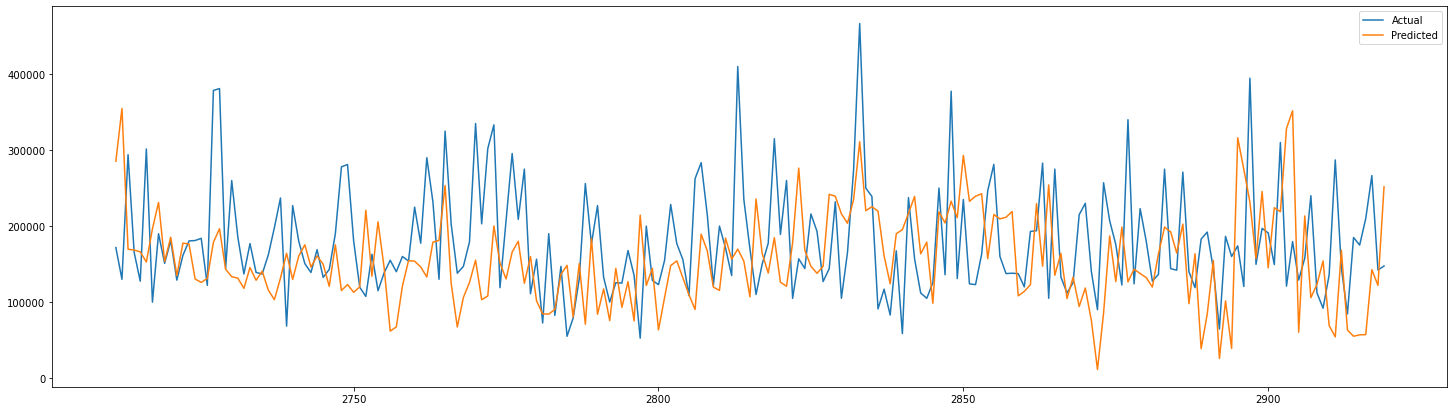

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,7))

plt.plot(df_test.Id[1250:], df_train.SalePrice[1251:])
plt.plot(df_test.Id[1250:], preds[1250:])
plt.legend(['Actual','Predicted'])